In [1]:
import cv2

In [2]:
file_name = "hand_example.jpg"
img = cv2.imread(file_name) # 0 - 255 (2^8-1) for int type
print(type(img))

<class 'numpy.ndarray'>


In [3]:
print(img.shape)

(183, 276, 3)


In [4]:
def showImage(window_name, img, wait=0):
    cv2.imshow(window_name, img)
    cv2.waitKey(wait)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [5]:
showImage("test", img)

In [8]:
import numpy as np

In [25]:
#empty 256 x 256 x 3
#img = np.zeros((256,256,3)) # 0-1 for float type
img = np.ones((256,256,3))

In [14]:
showImage("test", img)

In [35]:
# circle     Color: blue green red
img = np.ones((256,256,3))
circle_img = cv2.circle(img, (128,200), 50, (1.0,0.0,0.0) , -1)
showImage("circle", circle_img)

In [38]:
cap = cv2.VideoCapture(0)
# cap.isOpened()
# cap.isRead()
while cap.isOpened():
    success, img = cap.read()
    if not success:
        print("read fail")
        continue
    
    cv2.imshow("cam", img)
    key = cv2.waitKey(5) # if no key is pressed = -1,  esc = 27
    
    if key ==27:
        break
    
cv2.destroyAllWindows()
cv2.waitKey(1)
cap.release()

    

In [40]:
import mediapipe as mp

In [41]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

In [42]:
file_name = "hand_example.jpg"
img = cv2.imread(file_name)
img = cv2.flip(img, 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [43]:
showImage("test",img)

In [44]:
hands = mp_hands.Hands(static_image_mode=True , max_num_hands = 2 , min_detection_confidence=0.5)
result = hands.process(img)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [45]:
print(type(result))

<class 'type'>


In [46]:
print(result.multi_handedness)

[classification {
  index: 0
  score: 1.0
  label: "Left"
}
]


In [49]:
result.multi_hand_landmarks

[landmark {
   x: 0.5883724093437195
   y: 0.600513756275177
   z: -0.000110394146759063
 }
 landmark {
   x: 0.5964284539222717
   y: 0.4884115755558014
   z: -0.03624233976006508
 }
 landmark {
   x: 0.5781431198120117
   y: 0.38453158736228943
   z: -0.0748046487569809
 }
 landmark {
   x: 0.5291162729263306
   y: 0.3363705575466156
   z: -0.11463189870119095
 }
 landmark {
   x: 0.4888070821762085
   y: 0.37840044498443604
   z: -0.13403581082820892
 }
 landmark {
   x: 0.5029683709144592
   y: 0.39451998472213745
   z: -0.012892842292785645
 }
 landmark {
   x: 0.46870309114456177
   y: 0.33749064803123474
   z: -0.04852629080414772
 }
 landmark {
   x: 0.5144006013870239
   y: 0.38258984684944153
   z: -0.034431178122758865
 }
 landmark {
   x: 0.5277401804924011
   y: 0.41310790181159973
   z: -0.008139082230627537
 }
 landmark {
   x: 0.48374348878860474
   y: 0.44325101375579834
   z: -0.021881410852074623
 }
 landmark {
   x: 0.44918763637542725
   y: 0.39258110523223877
   z

In [52]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
annotated_img = img.copy()
for hand_landmarks in result.multi_hand_landmarks:
    mp_drawing.draw_landmarks(annotated_img, hand_landmarks, mp_hands.HAND_CONNECTIONS)

showImage("annotated" , annotated_img)

In [54]:
len(result.multi_hand_landmarks)

1

In [58]:
hand_landmarks = result.multi_hand_landmarks[0]
print(len(hand_landmarks.landmark))
for landmark in hand_landmarks.landmark:
    print(landmark.x, landmark.y, landmark.z)

21
0.5883724093437195 0.600513756275177 -0.000110394146759063
0.5964284539222717 0.4884115755558014 -0.03624233976006508
0.5781431198120117 0.38453158736228943 -0.0748046487569809
0.5291162729263306 0.3363705575466156 -0.11463189870119095
0.4888070821762085 0.37840044498443604 -0.13403581082820892
0.5029683709144592 0.39451998472213745 -0.012892842292785645
0.46870309114456177 0.33749064803123474 -0.04852629080414772
0.5144006013870239 0.38258984684944153 -0.034431178122758865
0.5277401804924011 0.41310790181159973 -0.008139082230627537
0.48374348878860474 0.44325101375579834 -0.021881410852074623
0.44918763637542725 0.39258110523223877 -0.09561044722795486
0.5091753602027893 0.4431263506412506 -0.09601246565580368
0.520004153251648 0.47324565052986145 -0.07187885046005249
0.4690920114517212 0.4969234764575958 -0.03840291127562523
0.43961769342422485 0.4526430368423462 -0.103639155626297
0.4975220859050751 0.4890509247779846 -0.09666213393211365
0.5082223415374756 0.5160292387008667 -0

In [59]:
import matplotlib.pyplot as plt

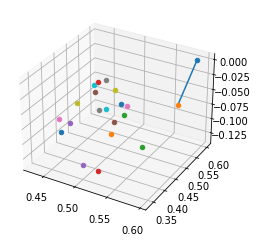

In [61]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
for landmark in hand_landmarks.landmark:
    #print(landmark.x, landmark.y, landmark.z)
    ax.scatter(landmark.x, landmark.y, landmark.z , marker='o')

landmark_0 = hand_landmarks.landmark[0]
landmark_1 = hand_landmarks.landmark[1]
xs = [landmark_0.x, landmark_1.x]
ys = [landmark_0.y, landmark_1.y]
zs = [landmark_0.z, landmark_1.z]
ax.plot(xs, ys, zs)

plt.show()

In [ ]:
#HW: annotated video & 3D visualization graph